d:\anaconda\envs\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
d:\anaconda\envs\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
d:\anaconda\envs\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
d:\anaconda\envs\ML\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
d:\anaconda\envs\ML\lib\site-packages\sklearn\linear_model\_

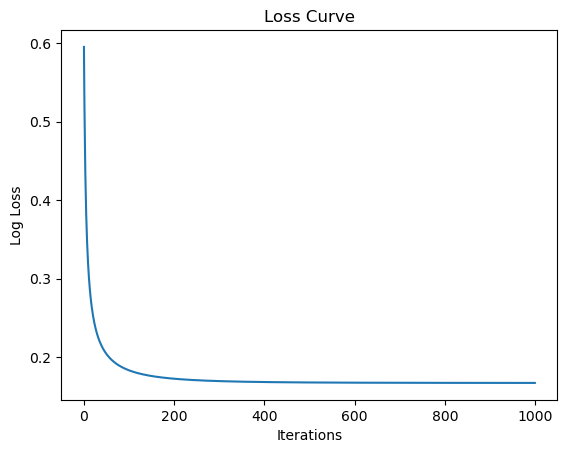

              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.94      0.81      0.87        21

    accuracy                           0.83        30
   macro avg       0.81      0.85      0.82        30
weighted avg       0.86      0.83      0.84        30

Confusion Matrix:
 [[ 8  1]
 [ 4 17]]


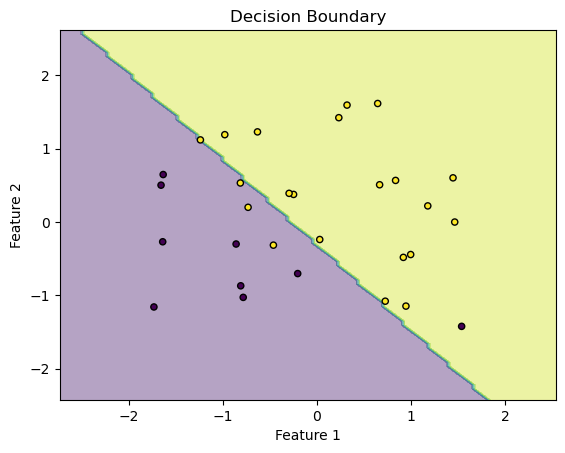

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, classification_report, confusion_matrix

# 加载数据集
file_path = 'data2.txt'
data = pd.read_csv(file_path, header=None, names=["Feature1", "Feature2", "Target"], sep=",")

# 划分训练集和验证集
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 特征归一化
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.iloc[:, :-1])
y_train = train_data.iloc[:, -1].values
X_test = scaler.transform(test_data.iloc[:, :-1])
y_test = test_data.iloc[:, -1].values

# 使用SGDClassifier进行逻辑回归
model = SGDClassifier(loss='log', penalty='l2', max_iter=1, warm_start=True, learning_rate='constant', eta0=0.01)

# 记录每次迭代的损失
losses = []
for _ in range(1000):
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_train)
    losses.append(log_loss(y_train, predictions))

# 绘制Loss曲线
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.show()

# 预测和评估
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

# 绘制分类直线
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X_test, y_test, model)
